In [ ]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
##from sklearn.neural_network import MLPRegressor
##from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import pickle

In [ ]:
df = pd.read_csv('dataset_rain.csv')
df.head()

,ProvinceID,Province_Name,Year,DSL (Day),R35mm (Day),MONTH,MIN,MAX,MEAN
0,10,Bangkok,1979,22,6,1,0.000000,59.490002,5.510257
1,10,Bangkok,1979,22,6,2,0.000000,82.089996,13.988614
2,10,Bangkok,1979,22,6,3,0.000000,87.500000,5.046234
3,10,Bangkok,1979,22,6,4,3.040000,469.399994,94.045527
4,10,Bangkok,1979,22,6,5,28.209999,595.280029,187.959924


In [ ]:
df.drop(columns=['ProvinceID'], axis=1, inplace=True)

In [ ]:
df.head()

,Province_Name,Year,DSL (Day),R35mm (Day),MONTH,MIN,MAX,MEAN
0,Bangkok,1979,22,6,1,0.000000,59.490002,5.510257
1,Bangkok,1979,22,6,2,0.000000,82.089996,13.988614
2,Bangkok,1979,22,6,3,0.000000,87.500000,5.046234
3,Bangkok,1979,22,6,4,3.040000,469.399994,94.045527
4,Bangkok,1979,22,6,5,28.209999,595.280029,187.959924


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41580 entries, 0 to 41579
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Province_Name  41580 non-null  object 
 1   Year           41580 non-null  int64  
 2   DSL (Day)      41580 non-null  int64  
 3   R35mm (Day)    41580 non-null  int64  
 4   MONTH          41580 non-null  int64  
 5   MIN            41580 non-null  float64
 6   MAX            41580 non-null  float64
 7   MEAN           41580 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.5+ MB


In [ ]:
df.shape

(41580, 8)

In [ ]:
df.describe()

,Year,DSL (Day),R35mm (Day),MONTH,MIN,MAX,MEAN
count,41580.000000,41580.000000,41580.000000,41580.000000,41580.000000,41580.000000,41580.000000
mean,2001.000000,12.613853,10.455988,6.500000,14.611500,624.719444,121.994648
std,12.987329,4.167862,4.438100,3.452094,19.943841,390.333779,87.453990
min,1979.000000,3.000000,3.000000,1.000000,0.000000,28.750000,0.955234
25%,1990.000000,10.000000,8.000000,3.750000,0.000000,294.180008,37.392173
50%,2001.000000,12.000000,9.000000,6.500000,2.125000,592.009979,116.940366
75%,2012.000000,14.000000,12.000000,9.250000,25.605000,874.195023,193.470326
max,2023.000000,59.000000,43.000000,12.000000,87.480003,2106.199951,334.140779


**Check Duplicate**

In [ ]:
print('duplicated: %s'%df.duplicated().sum())

duplicated: 0


In [ ]:
df.columns

Index(['Province_Name', 'Year', 'DSL (Day)', 'R35mm (Day)', 'MONTH', 'MIN',
       'MAX', 'MEAN'],
      dtype='object')

**Check Outlier**

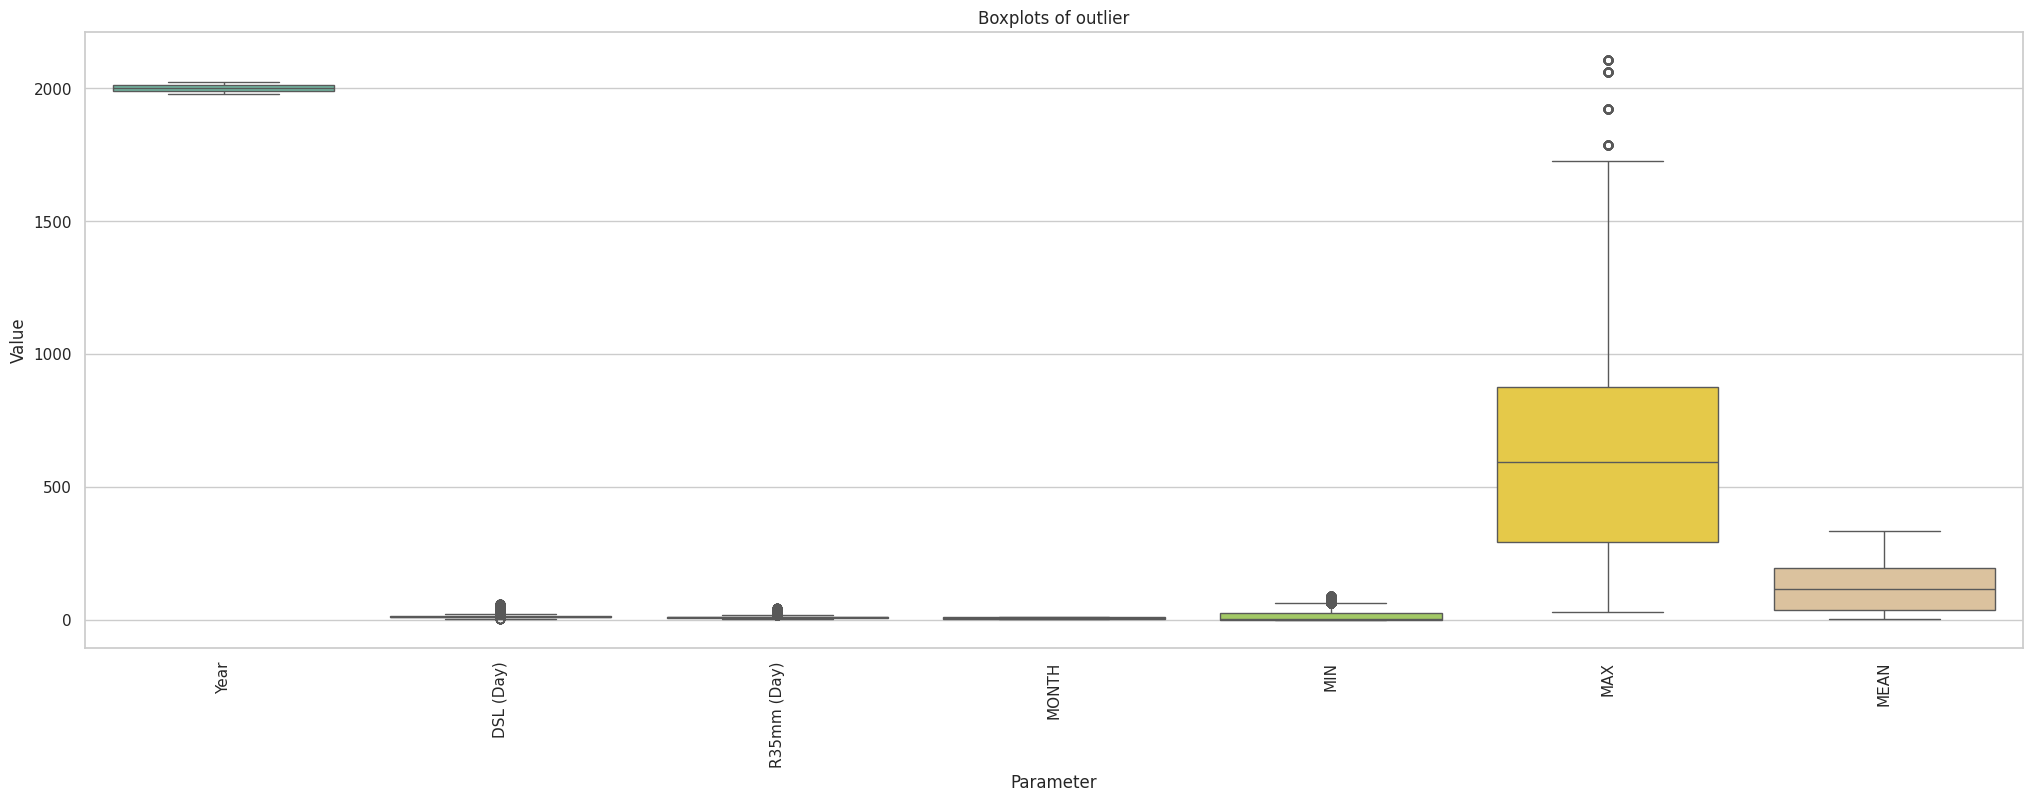

In [ ]:
sns.set(style="whitegrid")
columns_to_plot = ['Province_Name', 'Year', 'DSL (Day)', 'R35mm (Day)', 'MONTH', 'MIN', 'MAX', 'MEAN']
plt.figure(figsize=(25, 8))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.title('Boxplots of outlier')
plt.ylabel('Value')
plt.xlabel('Parameter')
plt.xticks(rotation=90)
plt.show()

**Check Missing Values**

In [ ]:
df.isnull().sum(axis=0)

Province_Name    0
Year             0
DSL (Day)        0
R35mm (Day)      0
MONTH            0
MIN              0
MAX              0
MEAN             0
dtype: int64

**Prediction**

In [ ]:
x = df[['DSL (Day)', 'MIN', 'MAX', 'MEAN']]
y = df[['R35mm (Day)']]

In [ ]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)
x_norm

array([[0.33928571, 0.        , 0.01479699, 0.01367113],
       [0.33928571, 0.        , 0.02567571, 0.03911749],
       [0.33928571, 0.        , 0.02827986, 0.01227844],
       ...,
       [0.05357143, 0.28155006, 0.21605334, 0.59331674],
       [0.05357143, 0.        , 0.45544298, 0.24237585],
       [0.05357143, 0.        , 0.36704133, 0.09922462]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

**Linear Model**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_pred = linear_model.predict(x_test)

linear_MAE = mean_absolute_error(y_test, linear_pred)
linear_MSE = mean_squared_error(y_test, linear_pred)
linear_RMSE = np.sqrt(linear_MSE)

print(linear_MAE)
print(linear_MSE)
print(linear_RMSE)

3.2043676876357274
18.791164087719256
4.334877632381248


**SVR Model**

In [ ]:
svr_model = SVR()
svr_model.fit(x_train, y_train)
svr_pred = svr_model.predict(x_test)

svr_MAE = mean_absolute_error(y_test, svr_pred)
svr_MSE = mean_squared_error(y_test, svr_pred)
svr_RMSE = np.sqrt(svr_MSE)

print(svr_MAE)
print(svr_MSE)
print(svr_RMSE)

3.01152863099715
19.248035523474645
4.387258315106901


**KNN Model**

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

knn_MAE = mean_absolute_error(y_test, knn_pred)
knn_MSE = mean_squared_error(y_test, knn_pred)
knn_RMSE = np.sqrt(knn_MSE)

print(knn_MAE)
print(knn_MSE)
print(knn_RMSE)

2.8711880711880706
16.329158249158247
4.040935318606108


In [ ]:
df = pd.DataFrame({'Actual': y_test.iloc[:100, 0], 'Predicted': linear_pred[:100][:,0], 'Data Point': range(100)})
fig = px.line(df, x='Data Point', y=['Actual', 'Predicted'], title='Comparison of actual and predicted values - <span style="color:red">Linear</span>',
              labels={'value': 'Test Value', 'Data Point': 'Data Point'})
fig.update_layout(xaxis_title="Data Point", yaxis_title="Test Value", width=1400, height=650)
fig.show()

In [ ]:
df_svr = pd.DataFrame({'Actual': y_test.iloc[:100, 0], 'Predicted': svr_pred[:100], 'Data Point': range(100)})
fig_svr = px.line(df_svr, x='Data Point', y=['Actual', 'Predicted'], title='Comparison of actual and predicted values - <span style="color:red">Support Vector Regression</span>',
                  labels={'value': 'Test Value', 'Data Point': 'Data Point'})
fig_svr.update_layout(xaxis_title="Data Point", yaxis_title="Test Value", width=1400, height=650)
fig_svr.show()

In [ ]:
y_test_squeezed = np.squeeze(y_test.iloc[:100, 0])
knn_pred_squeezed = np.squeeze(knn_pred[:100])

df_knn = pd.DataFrame({'Actual': y_test_squeezed, 'Predicted': knn_pred_squeezed, 'Data Point': range(100)})
fig_knn = px.line(df_knn, x='Data Point', y=['Actual', 'Predicted'], title='Comparison of actual and predicted values - <span style="color:red">K-Nearest Neighbors</span>',
                  labels={'value': 'Test Value', 'Data Point': 'Data Point'})
fig_knn.update_layout(xaxis_title="Data Point", yaxis_title="Test Value", width=1400, height=650)
fig_knn.show()

In [ ]:
import plotly.graph_objects as go
fig_combined = go.Figure()

fig_combined.add_trace(go.Scatter(x=df['Data Point'], y=df['Actual'], mode='lines', name='Actual (Linear Regression)', line=dict(color='red')))
fig_combined.add_trace(go.Scatter(x=df['Data Point'], y=df['Predicted'], mode='lines', name='Predicted (Linear Regression)', line=dict(color='blue')))
fig_combined.add_trace(go.Scatter(x=df_svr['Data Point'], y=df_svr['Predicted'], mode='lines', name='Predicted (SVR)', line=dict(color='yellow')))
fig_combined.add_trace(go.Scatter(x=df_knn['Data Point'], y=df_knn['Predicted'], mode='lines', name='Predicted (KNN)', line=dict(color='green')))
fig_combined.update_layout(title="Comparison of actual and predicted values across all models",
                           xaxis_title="Data Point", yaxis_title="Test Value", width=1400, height=650)
fig_combined.show()


In [ ]:
data = {
    "Model": ["Linear Regression", "Support Vector Regression", "K-Nearest Neighbors"],
    "MAE": [linear_MAE, svr_MAE, knn_MAE],
    "MSE": [linear_MSE, svr_MSE, knn_MSE],
    "RMSE": [linear_RMSE, svr_RMSE, knn_RMSE]
}
df_performance = pd.DataFrame(data)
df_performance_melted = df_performance.melt(id_vars=["Model"], var_name="Metric", value_name="Value")
fig = px.bar(df_performance_melted, x="Metric", y="Value", color="Model", barmode="group",
             title="Comparison of performance Metrics among Linear Regression, SVR, and KNN",
             labels={"Value": "Metric Value", "Metric": "Metric", "Model": "Model"},
             color_discrete_map={"Linear": "RoyalBlue", "Support Vector Regression": "Crimson", "K-Nearest Neighbors": "Green"})
fig.update_layout(width=1400, height=650)
fig.show()